Project 2/
Parsa Mojgan/
April 9, 2024

The following is the code provided for the Langton’s Ant project.

In [56]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import timeit
class Ant2D:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width), dtype=int)
        self.ant_pos = [height // 2, width // 2]  # Start at the center
        self.direction = 0
        self.pattern = [[0, 0, 1, 0, 0],
                        [0, 1, 0, 1, 0],
                        [1, 0, 0, 0, 1],
                        [0, 1, 0, 1, 0],
                        [0, 0, 1, 0, 0]]  # Ant pattern


        ant_start_x = self.ant_pos[1] - len(self.pattern) // 2
        ant_start_y = self.ant_pos[0] - len(self.pattern) // 2
        self.grid[ant_start_y:ant_start_y+len(self.pattern), ant_start_x:ant_start_x+len(self.pattern[0])] = self.pattern

    def turn_right(self):
        self.direction = (self.direction + 1) % 4

    def turn_left(self):
        self.direction = (self.direction - 1) % 4

    def move(self):
        if self.grid[self.ant_pos[0], self.ant_pos[1]] == 0:
            self.turn_right()
            self.grid[self.ant_pos[0], self.ant_pos[1]] = 1
        else:
            self.turn_left()
            self.grid[self.ant_pos[0], self.ant_pos[1]] = 0

        if self.direction == 0:
            self.ant_pos[0] = (self.ant_pos[0] - 1) % self.height
        elif self.direction == 1:
            self.ant_pos[1] = (self.ant_pos[1] + 1) % self.width
        elif self.direction == 2:
            self.ant_pos[0] = (self.ant_pos[0] + 1) % self.height
        elif self.direction == 3:
            self.ant_pos[1] = (self.ant_pos[1] - 1) % self.width



Above code block implements the Ant2D CA class with methods to initialize the grid, move the ant according to Langton's Ant rules, and update cell states.

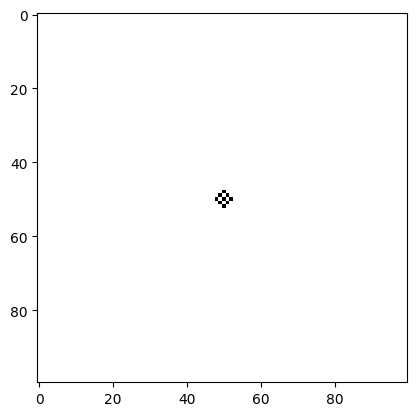

In [57]:

def animate(frames):
    fig, ax = plt.subplots()
    img = ax.imshow(frames[0], cmap='binary')

    def update(frame):
        ant_grid = frames[frame]
        img.set_data(ant_grid)
        return img,

    ani = FuncAnimation(fig, update, frames=len(frames), interval=50, blit=True)
    plt.show()

def main():
    width = 100
    height = 100
    steps = 1000

    frames = run_simulation(steps, width, height)
    animate(frames)

if __name__ == "__main__":
    main()

The run_simulation function generates frames by simulating the ant movement for a certain number of steps.
The animate function creates an animation using Matplotlib to visualize the frames.
In the main function, we define parameters for the experiment (grid size and number of steps) and call run_simulation and animate to execute the experiment and display the animation.



In [58]:
def run_simulation_timing(steps, width, height):
    ant = Ant2D(width, height)
    for _ in range(steps):
        ant.move()

def main():
    width = 100
    height = 100
    steps = 1000

    # Time the simulation
    execution_time = timeit.timeit(lambda: run_simulation_timing(steps, width, height), number=1)
    print("Execution time:", execution_time, "seconds")

if __name__ == "__main__":
    main()


Execution time: 0.0020264699996914715 seconds


Above code block measures the execution time of the simulation using Python's timeit module.

What is the Big-O time complexity of the algorithm we are using here to simulate this system, What implications does that have for running larger or longer CA experiments?The algorithm's time complexity is O(n), where n is the number of steps in the simulation. This implies that execution time grows linearly with the number of steps. Running larger or longer CA experiments will result in proportionally longer execution times.


Do these improvements change the Big-O time complexity? such optimizations could reduce the multiplicative coefficient (linear improvement) or the constant overhead. While they may not change the Big-O time complexity (which remains O(n)), they can enhance performance for specific scenarios.

